In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("./data/zezwolenie_na_prace_dane_roczne.csv")

# 1. Liczba zezwoleń na pracę cudzoziemca wydanych w latach 2008-2022

In [3]:
_df = df.groupby("rok")['liczba zezwoleń'].sum()

Text(0, 0.5, 'Liczba zezwoleń')

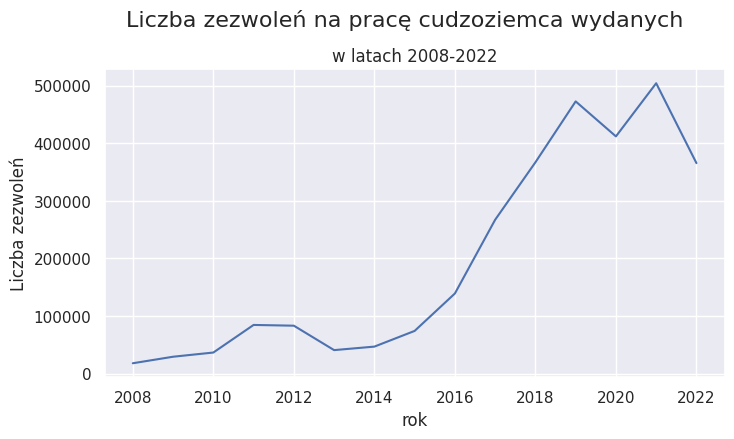

In [4]:
plt.figure(figsize=(8, 4))
_df.plot()
plt.suptitle("Liczba zezwoleń na pracę cudzoziemca wydanych", fontsize=16, y=1.03)
plt.title("w latach 2008-2022")
plt.ylabel("Liczba zezwoleń")

In [5]:
_df.to_frame()

,liczba zezwoleń
rok,
2008,18022
2009,29340
2010,36622
2011,84536
2012,83238
2013,40827
2014,46905
2015,74149
2016,139119


# 2. Liczba zezwoleń na pracę cudzoziemca wydanych dla osób z krajów islamskich

- Lista na podstawie https://panstwa-miasta.com.pl/kraje-islamskie/

In [6]:
KRAJE_ISLAMSKIE = "Mauretania", "Somalia", "Algieria", "Maroko", "Malediwy", "Komory", "Niger", "Tunezja", "Dżibuti", "Libia", "Gambia", "Sudan", "Mali", "Sierra Leone", "Burkina Faso", "Czad", "Senegal", "Gwinea", "Afganistan", "Iran", "Tadżykistan", "Azerbejdżan", "Jordania", "Jemen", "Pakistan", "Arabia Saudyjska", "Irak", "Turkmenistan", "Bangladesz", "Egipt", "Turcja", "Uzbekistan", "Indonezja", "Oman", "Syria", "Brunei", "Kirgistan", "Katar", "Kuwejt", "Bahrain", "Zjednoczone Emiraty Arabskie", "Kazachstan", "Liban", "Malezja"

In [7]:
df['kraj_arabski'] = df['kraj'].isin(KRAJE_ISLAMSKIE)

## 2.1. Zestawienie roczne

In [8]:
_df = df.query('kraj_arabski')
_df = _df.groupby('rok')['liczba zezwoleń'].sum()
_df.to_frame().T

rok,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
liczba zezwoleń,1827,2905,3745,7926,8314,3850,3666,3860,3947,10512,25069,32272,26369,57680,133253


## 2.1. Zestawienie roczne (procentowe)

In [9]:
_df_percent = _df / df.groupby('rok')['liczba zezwoleń'].sum()
_df_percent.astype(float).map("{:.2%}".format).to_frame().T

rok,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
liczba zezwoleń,10.14%,9.90%,10.23%,9.38%,9.99%,9.43%,7.82%,5.21%,2.84%,3.94%,6.83%,6.83%,6.40%,11.44%,36.46%


## 2.3. Wzrost: przed 2015 vs po 2015

In [10]:
_change = (_df[_df.index > 2015].mean() / _df[_df.index <= 2015].mean())
print(f"Wzorst o {_change:0%}")

Wzorst o 915.419294%


## 2.4. Zmiana liczby zezwoleń w czasie

Text(0, 0.5, 'Liczba zezwoleń')

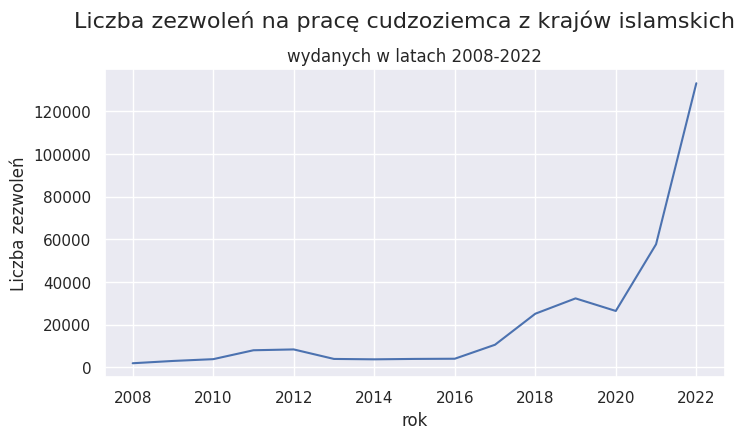

In [11]:
plt.figure(figsize=(8, 4))
_df.plot()
plt.suptitle("Liczba zezwoleń na pracę cudzoziemca z krajów islamskich", fontsize=16, y=1.03)
plt.title("wydanych w latach 2008-2022")
plt.ylabel("Liczba zezwoleń")

<Axes: title={'center': 'wydanych w latach 2008-2022'}, xlabel='rok'>

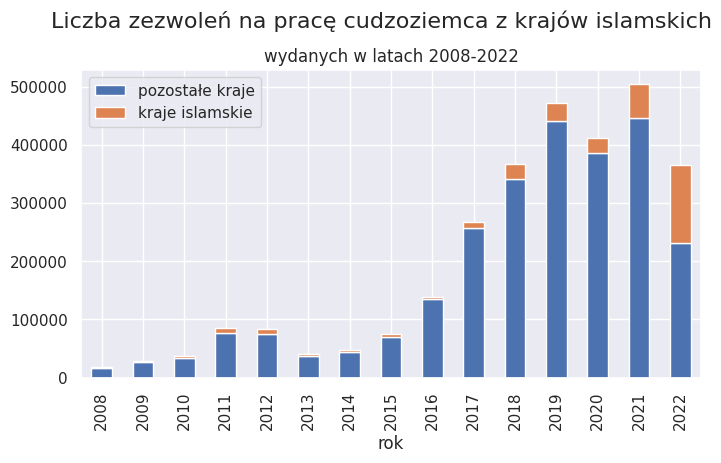

In [14]:
_df_relative = df.groupby('rok')['liczba zezwoleń'].sum().to_frame().join(_df.to_frame("kraje islamskie"))
_df_relative['pozostałe kraje'] = _df_relative['liczba zezwoleń'] - _df_relative['kraje islamskie']

_, ax = plt.subplots(1, 1, figsize=(8, 4))

plt.suptitle("Liczba zezwoleń na pracę cudzoziemca z krajów islamskich", fontsize=16, y=1.03)
plt.title("wydanych w latach 2008-2022")
_df_relative[['pozostałe kraje', 'kraje islamskie']].plot.bar(stacked=True, ax=ax)